In [1]:
#DATA CLEANING EXERCISE
#1) Straighten it out to a table of at least 7 columns.
#2) Identify the top 5 predominant ages in the dataset.
#3) Determine the bank with the largest share transactions
#4) Show a distribution of channels used on transactions



In [5]:
import numpy as np
import pandas as pd
from datetime import datetime
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
df = pd.read_excel(r"C:\\Users\\Uchenna\Desktop\\my work\\killa.xlsx")
df.head()

,First Name,Last Name,transaction
0,nooeukw,uuoaklowalb,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
1,angulbo,seagn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
2,dukowi,eukloomja,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
3,ltuoawiob,uuilawobmn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
4,nakuolo,donald,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."


In [3]:
#Quick overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   First Name   127 non-null    object
 1   Last Name    127 non-null    object
 2   transaction  127 non-null    object
dtypes: object(3)
memory usage: 3.1+ KB


In [4]:
#A close look at the transaction column
df['transaction'][2]

"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date': '2020-06-13T06:00:46.904000Z', 'tx_amount': 29627, 'tx_mode': 'Debit', 'tx_channel': 'mobile', 'bank_name': 'GBank', 'dob': ['1992-01-01 00:00:00']}"

In [8]:
df['transaction']=df['transaction'].map(eval)

In [11]:
pd.json_normalize(df['transaction'])

,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[1992-11-10 00:00:00]
1,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]
2,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[1992-01-01 00:00:00]
3,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[1981-01-07 00:00:00]
4,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]
...,...,...,...,...,...,...,...
122,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[n/a]
123,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[n/a]
124,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]
125,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]


In [13]:
df = pd.concat([df[['First Name','Last Name']], pd.json_normalize(df['transaction'])],axis=1)

In [14]:
df.head()
#Straighten it out to a table of at least 7 columns

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[1992-11-10 00:00:00]
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[1992-01-01 00:00:00]
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[1981-01-07 00:00:00]
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]


In [15]:
#identify the top 5 prodominant ages in the dataset
df['dob'].head()

0    [1992-11-10 00:00:00]
1                    [n/a]
2    [1992-01-01 00:00:00]
3    [1981-01-07 00:00:00]
4                    [n/a]
Name: dob, dtype: object

In [16]:
df['dob'] = df['dob'].apply(pd.Series)

In [17]:
df.head(2)

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10 00:00:00
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,n/a


In [23]:
df.to_csv(r"C:\\Users\\Uchenna\Desktop\\my work\\killa.csv")

In [25]:
df = pd.read_csv('killa.csv', parse_dates =  ['dob'])
df.head(2)

,Unnamed: 0,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10
1,1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,NaT


In [29]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [30]:
df.head(2)

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,NaT


In [31]:
df['year'] = pd.to_datetime(df['dob'], unit ='ms').dt.year

In [32]:
df.head(2)

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob,year
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10,1992.0
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,NaT,NaN


In [34]:
age = df['year'].value_counts().head()
print(age)

1992.0    6
1980.0    5
1989.0    4
1976.0    4
1999.0    3
Name: year, dtype: int64


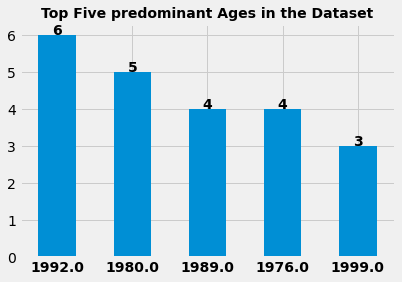

In [35]:
age.plot(kind='bar')
plt.xticks(rotation=0,weight='bold')
plt.title('Top Five predominant Ages in the Dataset', weight ='bold', fontsize=14)
for i,j in enumerate(age):
    plt.text(i,j,j, ha = 'center', weight ='bold')

In [36]:
 #Determine the Bank with the Largest share of transaction
bank_trans = df['bank_name'].value_counts()
bank_trans

GBank    32
ABank    32
QBank    32
KBank    31
Name: bank_name, dtype: int64

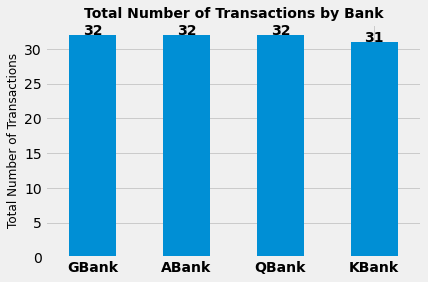

In [40]:
#Viaua;izing the information above
bank_trans.plot(kind='bar')
plt.ylabel('Total Number of Transactions', fontsize=12)
plt.xticks(rotation=0, weight='bold')
plt.title('Total Number of Transactions by Bank', weight='bold',fontsize=14)
for i,j in enumerate(bank_trans):
    plt.text(i,j,j, ha = 'center', weight ='bold')

In [42]:
# Show distribution of channels used on transactions
channel= df['tx_channel'].value_counts()
channel

mobile    64
web       63
Name: tx_channel, dtype: int64

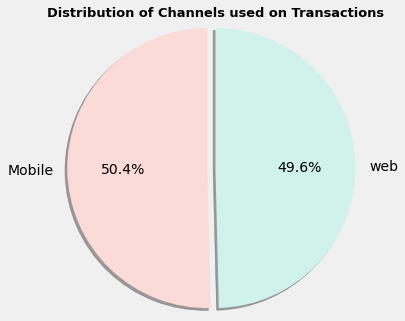

In [45]:
#Visualizing the results
plt.figure(figsize=(10,5))

color= ("#FADBD8", "#D1F2EB")
plt.pie(channel, data = df, explode=[0.07,0], labels=("Mobile", "web"),
       autopct="%1.1f%%", colors=color, shadow=True, startangle=90, radius=1.2)
plt.title("Distribution of Channels used on Transactions", loc="center", fontsize =13, weight= 'bold')
plt.show()